### This notebook perform simple affine transformation to DETRAC video frames and save them

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
vid_path = 'MVI_39401'
allframes = os.listdir(vid_path)
frames_path = []
for frame in allframes:
    frames_path.append(os.path.join(vid_path, frame))
frames_path[:5]

['MVI_39401\\img00001.jpg',
 'MVI_39401\\img00002.jpg',
 'MVI_39401\\img00003.jpg',
 'MVI_39401\\img00004.jpg',
 'MVI_39401\\img00005.jpg']

In [25]:
out_path = 'MVI_39401_AffineXform2'
for frame, fpath in zip(allframes, frames_path):
    fimg = cv2.imread(fpath)
    fimg = cv2.cvtColor(fimg, cv2.COLOR_BGR2RGB)
    rows, cols, ch = fimg.shape
    pts1 = np.float32([[200,200],[600,200],[200,400]])
    pts2 = np.float32([[200,200],[650,250],[200,400]])
    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(fimg,M,(cols,rows))
    cv2.imwrite(os.path.join(out_path, frame), dst)

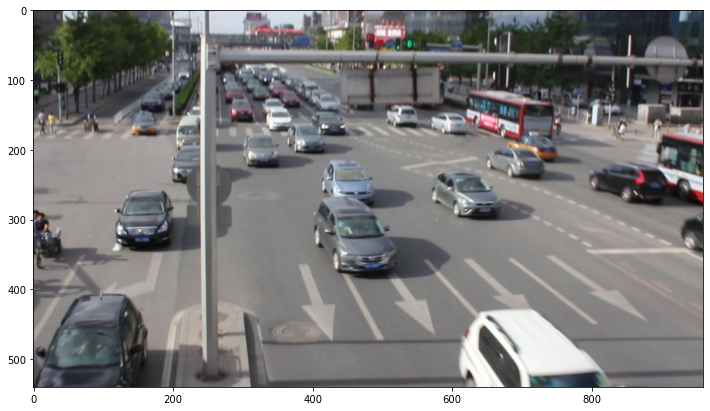

In [9]:
img = cv2.imread(frames_path[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img)

### Some image prototype codes

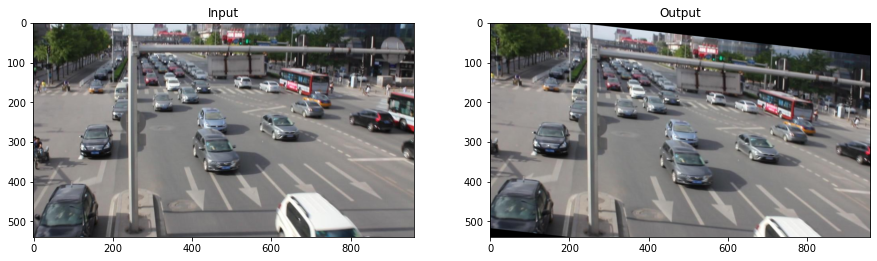

In [24]:
rows, cols, ch = img.shape
pts1 = np.float32([[200,200],[600,200],[200,400]])
# pts2 = np.float32([[200,200],[500,250],[200,400]])
pts2 = np.float32([[200,200],[650,250],[200,400]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.figure(figsize=(15, 12))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

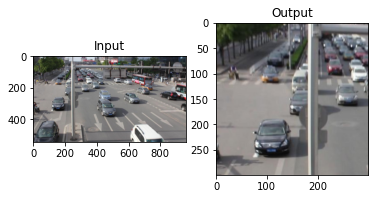

In [11]:
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()